### You must include a written description of three observable trends based on the data.

1. Rural rides have a higher variance on the fare, which makes sense as I took a taxi from small town USA to 2nd smallest town USA for 128$ in 2012 (Which would be an outlier in this dataset).

2. Fares/ Drivers/ Rides are all similar in proportion. Although correlation does not imply causation, in this case, it seems that the number of riders is highly correlated with the number of drivers.

3. Urban areas seem most dense in terms of number of rides per city, fares, and driver count.


In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.cm as cm

In [3]:
#read the files and make them into a df
csv1 = os.path.join('raw_data','ride_data.csv')
csv2 = os.path.join('raw_data','city_data.csv')
ride_df = pd.read_csv(csv1)
city_df = pd.read_csv(csv2)

In [4]:
#Merge the two DF based on city
merge_df = pd.merge(ride_df, city_df, on="city")
merge_df.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
testmerge = merge_df.groupby('city')
testmerge2 = testmerge['ride_id'].count()
# testmerge2.sort_values('ride_id', ascending=False).head()
testmerge3 = pd.DataFrame(testmerge2)
testmerge3.sort_values('ride_id', ascending = False).head()


,ride_id
city,
Port Johnstad,34
Swansonbury,34
South Louis,32
Port James,32
Alvarezhaven,31


In [6]:
#average $ per ride per city
meandf = merge_df[["city", "fare"]]
groupmean = meandf.groupby('city')
# meancitydf = groupmean.mean()
# meancitydf.head()

In [7]:
#Total number of rides per city
ridespcity = merge_df.groupby("city")["ride_id"].count()
# ridedf = pd.DataFrame(ridespcity)
# ridedf.head()

In [8]:
#Total drivers per city
driverspcity = merge_df.groupby("city")["driver_count"].max()
# tddf = pd.DataFrame(driverspcity)
# tddf.head()

In [9]:
#Avg fare per city
avgpcity = merge_df.groupby("city")["fare"].mean()

# avgdf = pd.DataFrame(avgpcity)
# avgdf.head()


In [10]:

typedf = merge_df.groupby("city")["type"].max()
# typedf2 = typedf.drop_duplicates(subset = ['city'])
# typedf2.head()


In [11]:
plotdf = pd.concat([typedf, avgpcity, ridespcity, driverspcity], axis=1).reset_index()
plotdf.head()

,city,type,fare,ride_id,driver_count
0,Alvarezhaven,Urban,23.928710,31,21
1,Alyssaberg,Urban,20.609615,26,67
2,Anitamouth,Suburban,37.315556,9,16
3,Antoniomouth,Urban,23.625000,22,21
4,Aprilchester,Urban,21.981579,19,49


In [12]:
x = plotdf['ride_id']
y = plotdf['fare']
colors = {'Urban':'Gold', 'Suburban':'lightskyblue', 'Rural':'lightcoral'}
colorpick = plotdf['type'].apply(lambda x: colors[x])
plotdf['colorpick'] = pd.Series(colorpick, index=plotdf.index)
plotdf.head()


,city,type,fare,ride_id,driver_count,colorpick
0,Alvarezhaven,Urban,23.928710,31,21,Gold
1,Alyssaberg,Urban,20.609615,26,67,Gold
2,Anitamouth,Suburban,37.315556,9,16,lightskyblue
3,Antoniomouth,Urban,23.625000,22,21,Gold
4,Aprilchester,Urban,21.981579,19,49,Gold


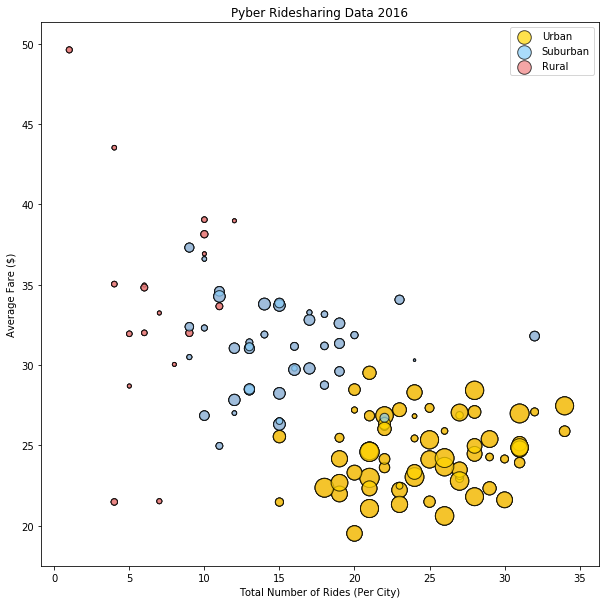

In [13]:
plt.figure(figsize = (10,10))

plt.title("Pyber Ridesharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")



# for i in colors:
        
#             plt.scatter(x,y, s=plotdf['driver_count']*5,  c=plotdf['type'].apply(lambda x: colors[x]), alpha = .7, edgecolors = 'black', label = i)
            

# plt.legend()
# plt.scatter(x,y, s=plotdf['driver_count']*5,  c=plotdf['type'].apply(lambda x: colors[x]), alpha = .7, edgecolors = 'black')
plt.scatter(x,y, s=plotdf['driver_count']*5,  c="Gold", alpha = .7, edgecolors = 'black', label = "Urban")
plt.scatter(x,y, s=plotdf['driver_count']*5,  c="lightskyblue", alpha = .7, edgecolors = 'black', label = "Suburban")
plt.scatter(x,y, s=plotdf['driver_count']*5,  c="lightcoral", alpha = .7, edgecolors = 'black', label = "Rural")

plt.legend()
plt.scatter(x,y, s=plotdf['driver_count']*5,  c=plotdf['type'].apply(lambda x: colors[x]), alpha = .7, edgecolors = 'black')


        



plt.show()

In [29]:
#total fares by city type
faresum = merge_df.groupby("type")
faredf = faresum["fare"].sum()
farepie = pd.DataFrame(faredf).reset_index()
farepie


,type,fare
0,Rural,4255.09
1,Suburban,19317.88
2,Urban,40078.34


In [44]:
# Labels for the sections of our pie chart
labels = farepie["type"]

# The values of each section of the pie chart
sizes = farepie["fare"]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

In [45]:
# Tell matplotlib to create a bar chart based upon the above data
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x1d6c747c550>,
 [Text(-0.97154,0.515859,'Rural'),
  Text(-0.858531,-0.687695,'Suburban'),
  Text(1.0724,0.538475,'Urban')],
 [Text(-0.529931,0.281378,'6.7%'),
  Text(-0.46829,-0.375106,'30.3%'),
  Text(0.625568,0.31411,'63.0%')])

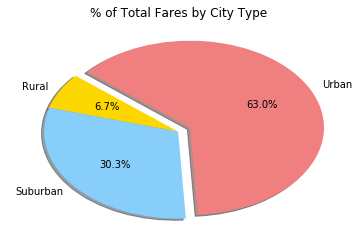

In [46]:
plt.title("% of Total Fares by City Type")

plt.savefig("PyPies.png")
plt.show()

In [48]:
sizes2 = ridepie["ride_id"]

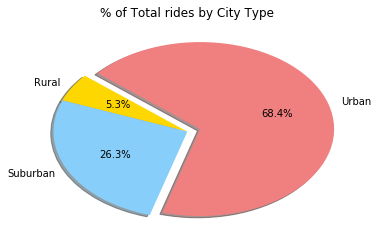

In [50]:
#total rides by city type
ridesum = merge_df.groupby("type")
ridecdf = faresum["ride_id"].count()
ridepie = pd.DataFrame(ridecdf).reset_index()
ridepie

# Tell matplotlib to create a bar chart based upon the above data
plt.pie(sizes2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total rides by City Type")

plt.savefig("PyPies2.png")
plt.show()


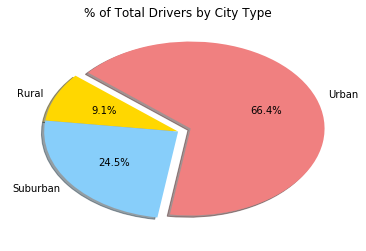

In [51]:
#total drivers by city type
drivecmax = merge_df.groupby("type")
drivecdf = drivecmax["driver_count"].max()
drivepie = pd.DataFrame(drivecdf).reset_index()
drivepie
sizes3 = drivepie["driver_count"]
# Tell matplotlib to create a bar chart based upon the above data
plt.pie(sizes3, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

plt.savefig("PyPies2.png")
plt.show()